In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import *
from plotter import *

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [2]:
#load the saved models
model_rank2 = torch.load("model_rank2.pt")
model_rank1 = torch.load("model_rank1.pt")

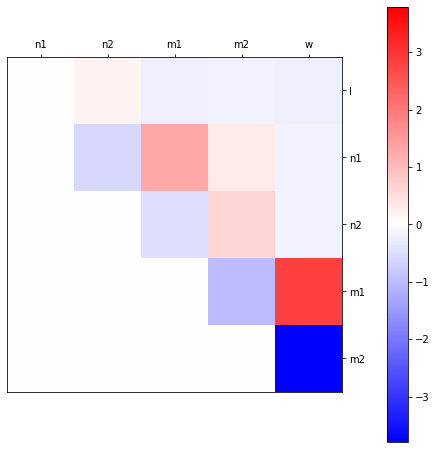

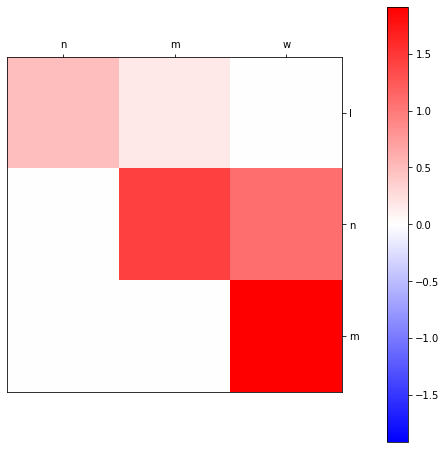

In [3]:

visCov(model_rank2,flip_m_n=True)
visCov(model_rank1,flip_m_n=True)

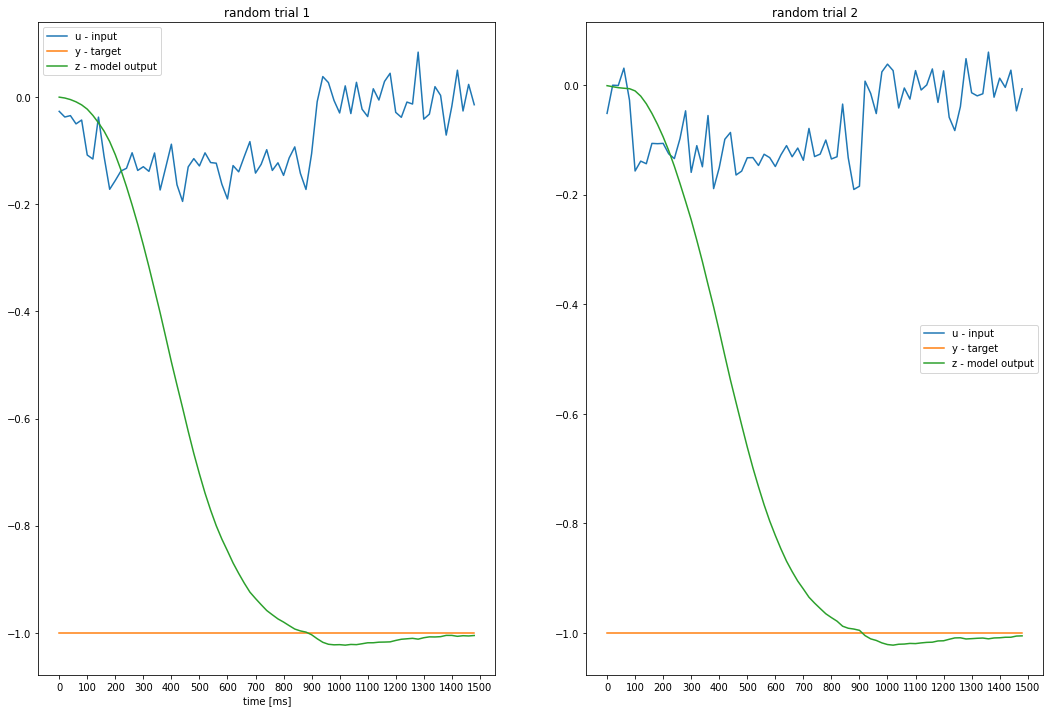

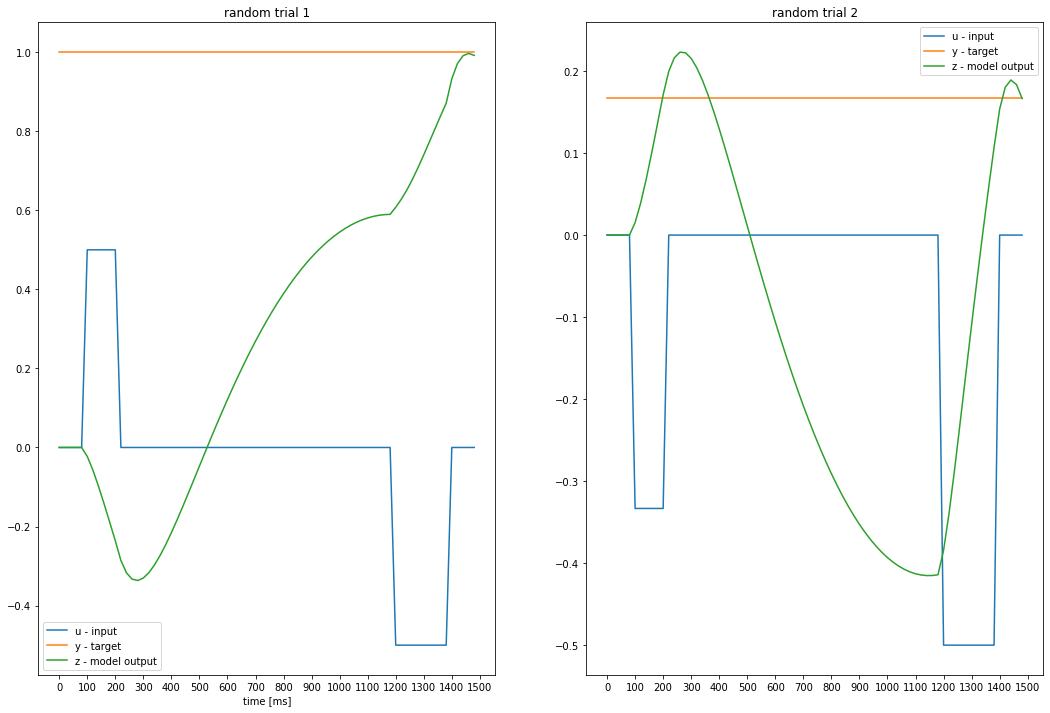

In [4]:
visITO(SingleDecisionDataset, model_rank1)

visITO(ParametricDataset, model_rank2)

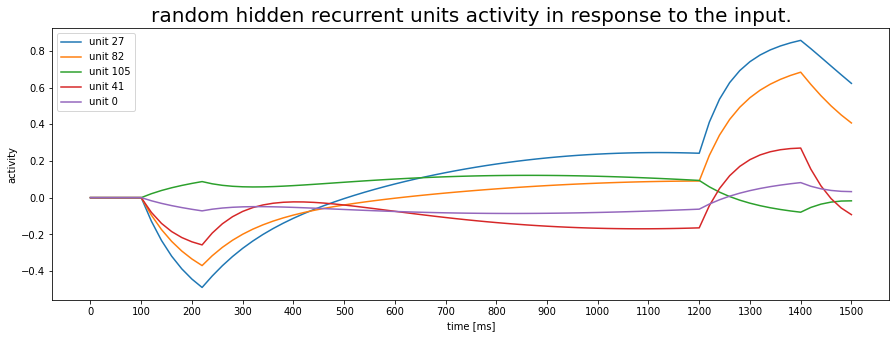

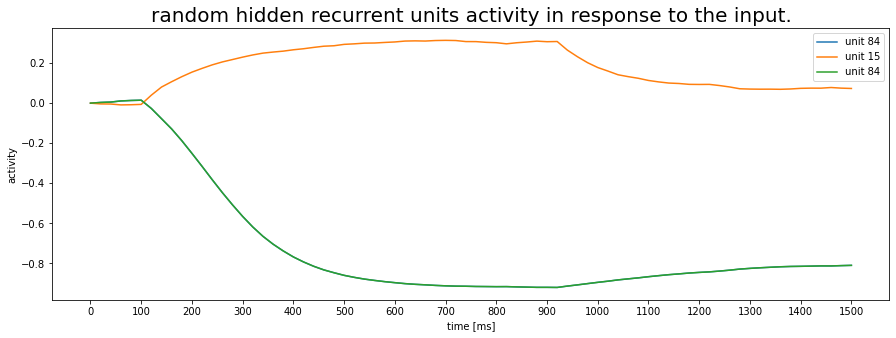

In [5]:
visUA(ParametricDataset, model_rank2)
visUA(SingleDecisionDataset, model_rank1)


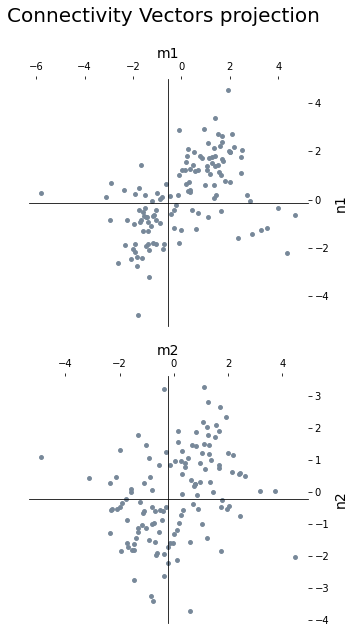

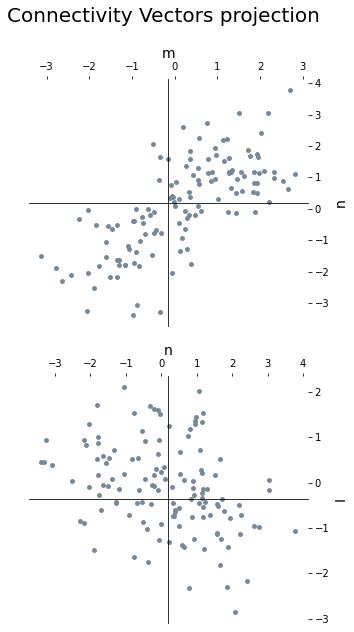

In [6]:
visWP(model_rank2)
visWP(model_rank1)

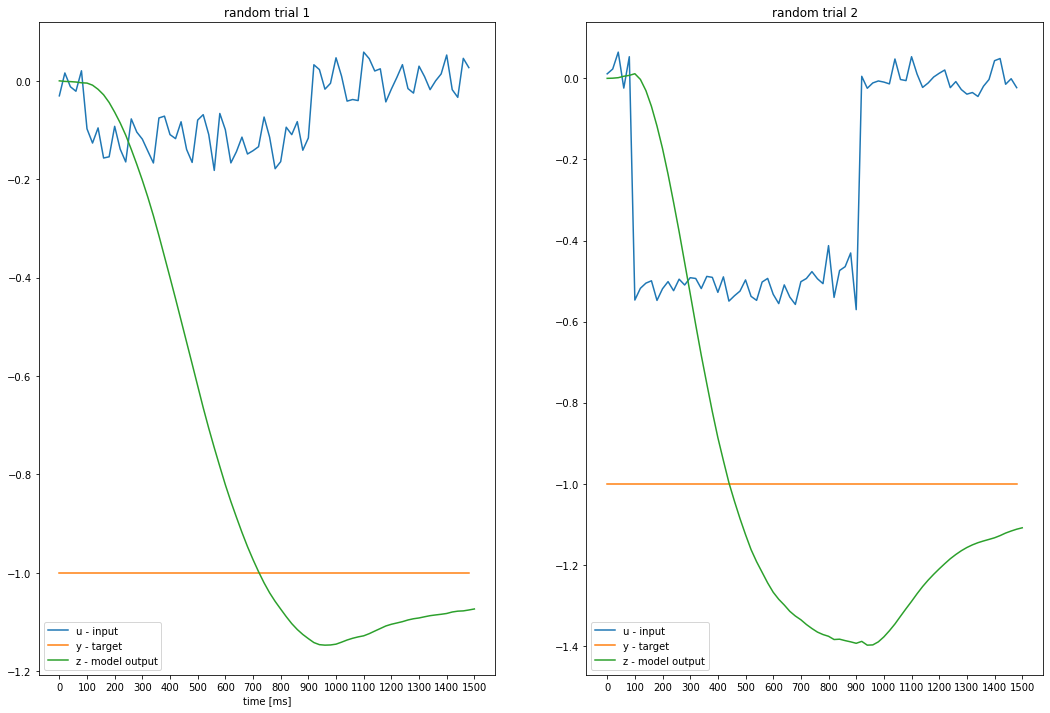

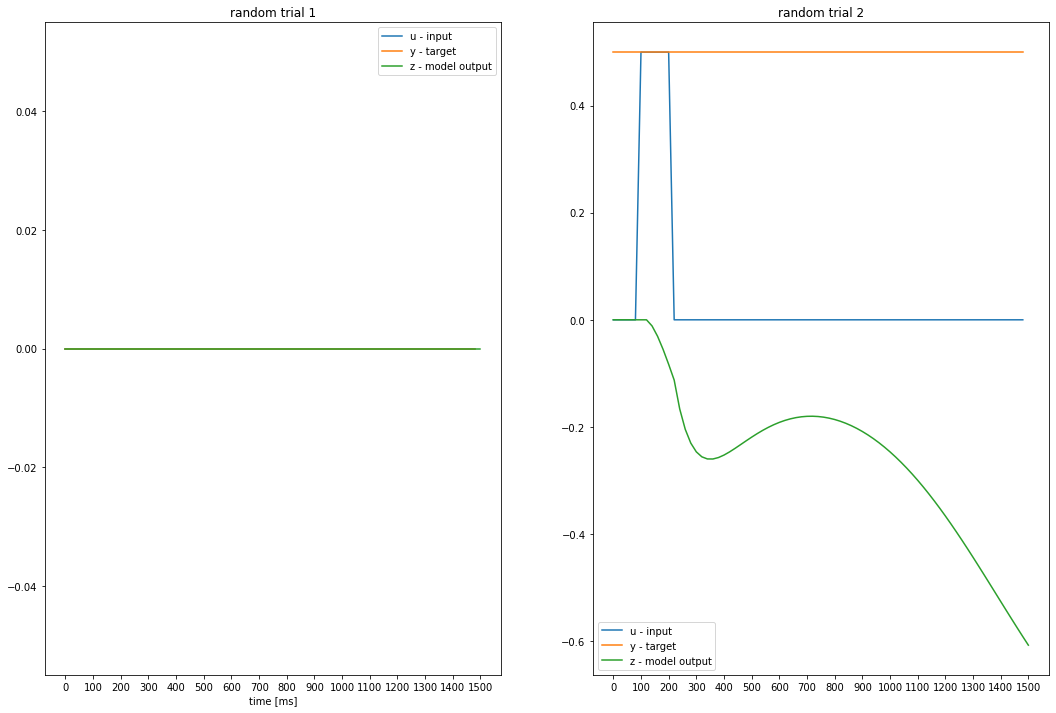

In [7]:
#check the equivalent one, two dimensional models
onedmodel= OneDimEquivalent(model_rank1)
twomodel= TwoDimEquivalent(model_rank2)

visITO(SingleDecisionDataset, onedmodel)
visITO(ParametricDataset, twomodel)


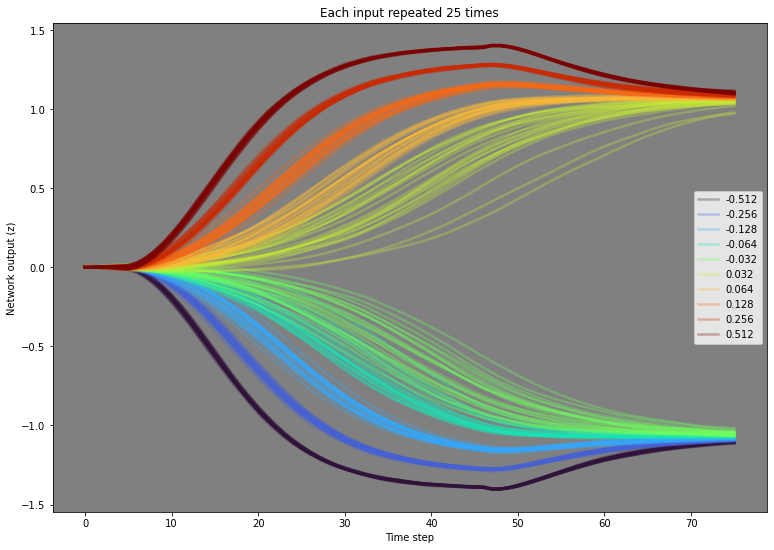

In [12]:

plot_input_range(onedmodel, 
               single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

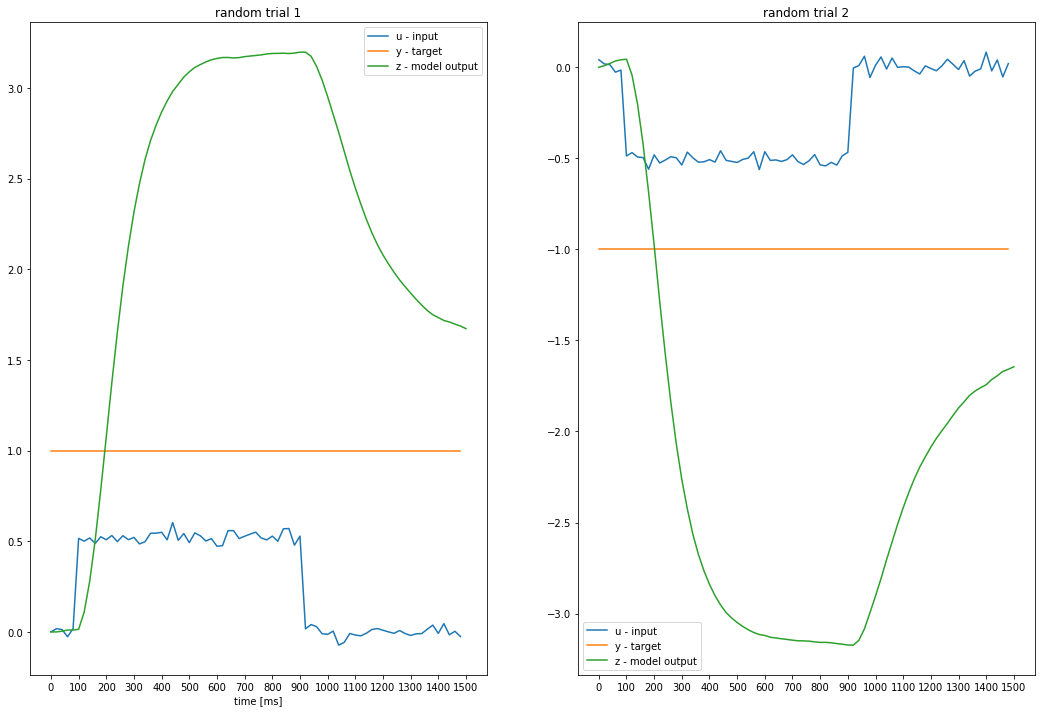

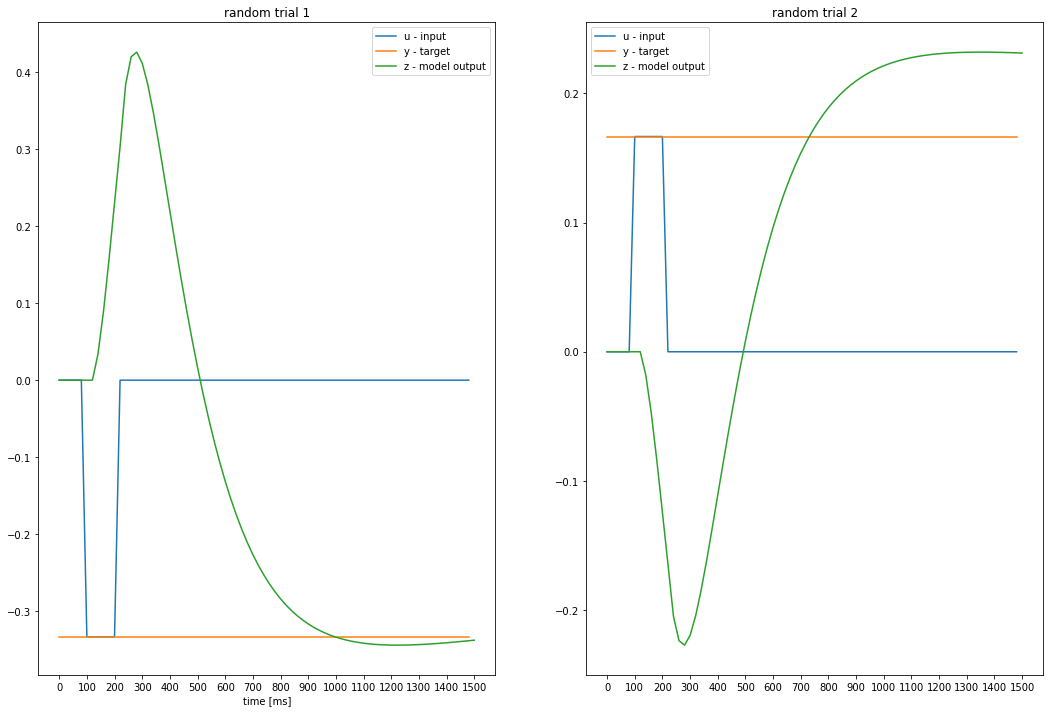

In [9]:
#check the equivalent one, two dimensional models
onedmodel_given= OneDimEquivalent(model_rank1,given_params=True)
twomodel_given= TwoDimEquivalent(model_rank2,given_params=True)

visITO(SingleDecisionDataset, onedmodel_given)
visITO(ParametricDataset, twomodel_given)


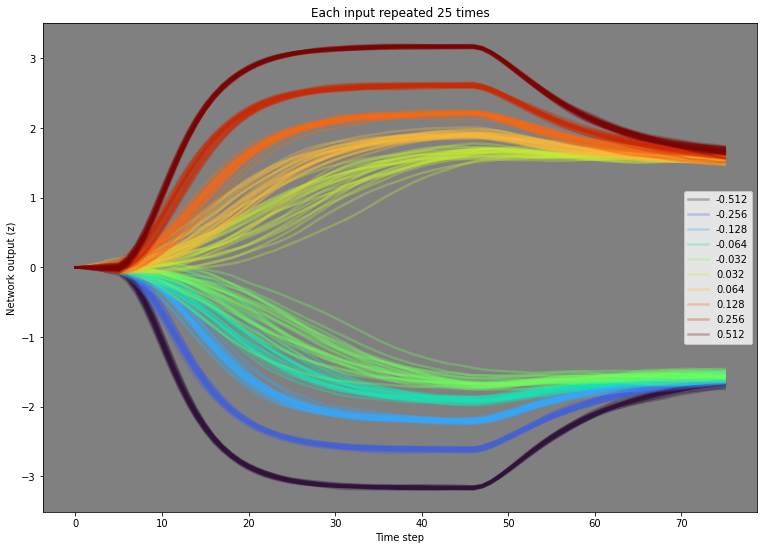

In [14]:

plot_input_range(onedmodel_given, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

[(10, 10), (10, 14), (10, 18), (10, 22), (10, 26), (10, 30), (14, 10), (14, 14), (14, 18), (14, 22), (14, 26), (14, 30), (18, 10), (18, 14), (18, 18), (18, 22), (18, 26), (18, 30), (22, 10), (22, 14), (22, 18), (22, 22), (22, 26), (22, 30), (26, 10), (26, 14), (26, 18), (26, 22), (26, 26), (26, 30), (30, 10), (30, 14), (30, 18), (30, 22), (30, 26), (30, 30)]


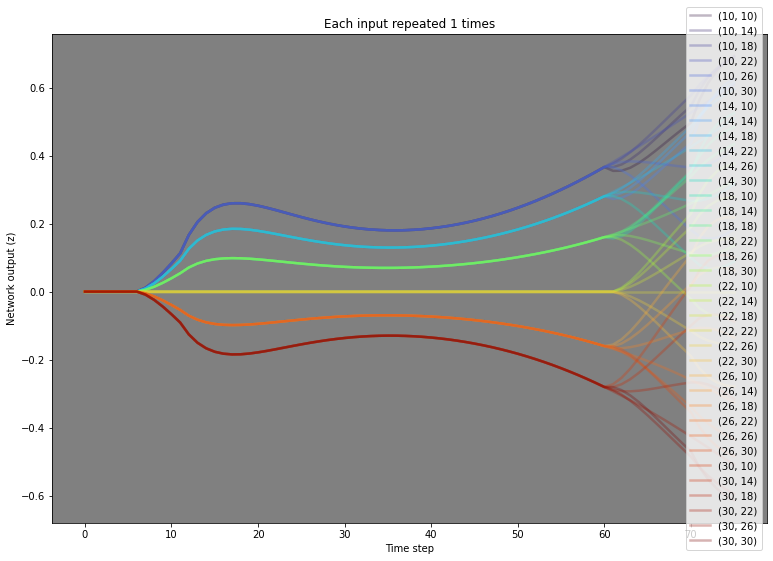

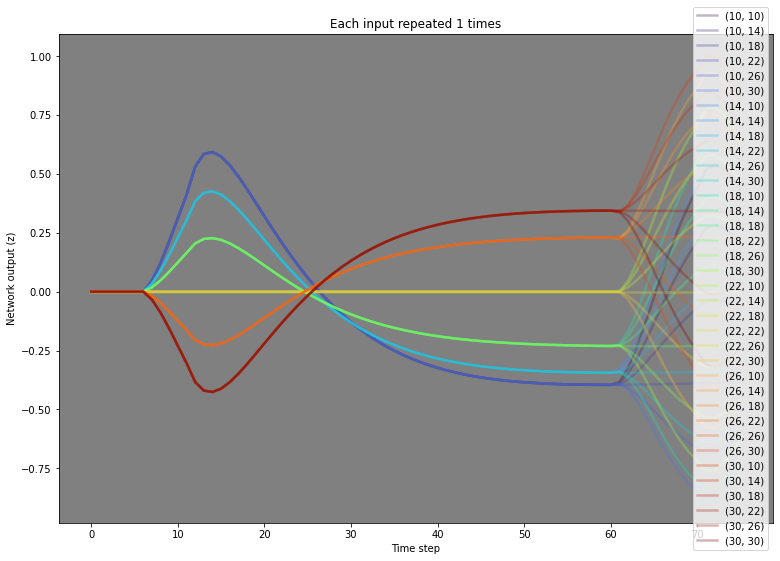

In [26]:
in_params = []

for i in [10,14,18,22,26,30]:
    for j in [10,14,18,22,26,30]:
        in_params.append((i,j)) 

print(in_params)

plot_input_range(twomodel, 
                parametric, 
                in_params,
                alpha=0.3,
                num_repeat=1,
                figsize=(16, 9),
                linewidth=2.5)
plot_input_range(twomodel_given, 
                parametric, 
                in_params,
                alpha=0.3,
                num_repeat=1,
                figsize=(16, 9),
                linewidth=2.5)

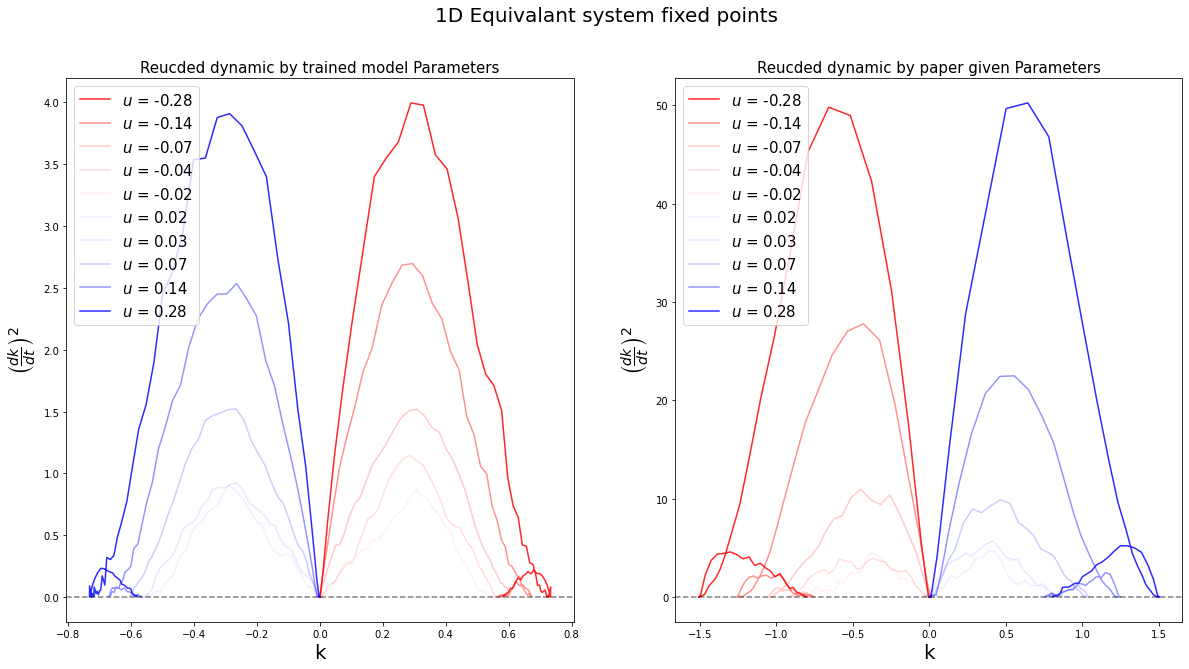

In [11]:

oneDfixedPointgiven=OneDimEquivalent(model_rank1,fixedPoint=True, given_params=True)
oneDfixedPoint=OneDimEquivalent(model_rank1,fixedPoint=True, given_params=False)

strength=(3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16])
fun=single_decision
u=np.zeros((10,75))
y=np.zeros((10,75))
for i in range(10):
    u[i,:], y[i,:]=fun(strength[i])

u=torch.tensor(u).float()
y=torch.tensor(y).float()

k,dk=oneDfixedPoint(u)
k_given,dk_given=oneDfixedPointgiven(u)

k=k.squeeze().detach().numpy()
k_given=k_given.squeeze().detach().numpy()
dk=dk.squeeze().detach().numpy()
dk_given=dk_given.squeeze().detach().numpy()
dk=dk**2
dk_given=dk_given**2

plt.figure(figsize=(20,10))
plt.suptitle('1D Equivalant system fixed points', fontsize=20)
plt.subplot(1,2,1)
ax=plt.gca()
ax.set_title('Reucded dynamic by trained model Parameters', fontsize=15)
for i in range(10):
    meanu=u[i].mean().item()
    if meanu > 0:
        plt.plot(k[i],dk[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='blue', alpha=3*meanu)
    else:
        plt.plot(k[i],dk[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='red', alpha=3*-meanu)
plt.axhline(0,color="black", alpha=0.5, linestyle='--')
plt.xlabel('k', fontsize=20)
plt.ylabel(r'$\left(\frac{dk}{dt}\right)^2$',fontsize=20)
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split('=')[1])))
plt.legend(handles, labels, loc='upper left' ,fontsize=15)

plt.subplot(1,2,2)
ax=plt.gca()
ax.set_title('Reucded dynamic by paper given Parameters', fontsize=15)
for i in range(10):
    meanu=u[i].mean().item()
    if meanu > 0:
        plt.plot(k_given[i],dk_given[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='blue', alpha=3*meanu)
    else:
        plt.plot(k_given[i],dk_given[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='red', alpha=3*-meanu)
plt.axhline(0,color="black", alpha=0.5, linestyle='--')
plt.xlabel('k', fontsize=20)
plt.ylabel(r'$\left(\frac{dk}{dt}\right)^2$',fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split('=')[1])))
plt.legend(handles, labels, loc='upper left',fontsize=15)